In [1]:
import pandas as pd

# Loading Student Habits vs Academic Performance Dataset
df = pd.read_csv('student_habits_performance.csv')

# View the first few rows
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
# Get dataset info
df.info()

# Check if there are missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [4]:
# Filling missing parental education with 'Unknown'

df['parental_education_level'].fillna('Unknown', inplace=True)

/var/folders/rf/7mxkckvj67n75dgt_jp9hz400000gn/T/ipykernel_22164/2895179052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna('Unknown', inplace=True)


In [5]:
# Checking again if missing values are removed

df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [6]:
# See unique categories for parental education

df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor', 'Unknown'], dtype=object)

In [7]:
# Summary statistics

df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


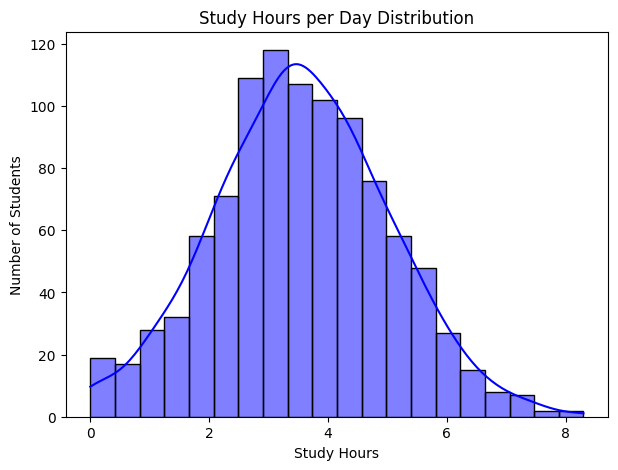

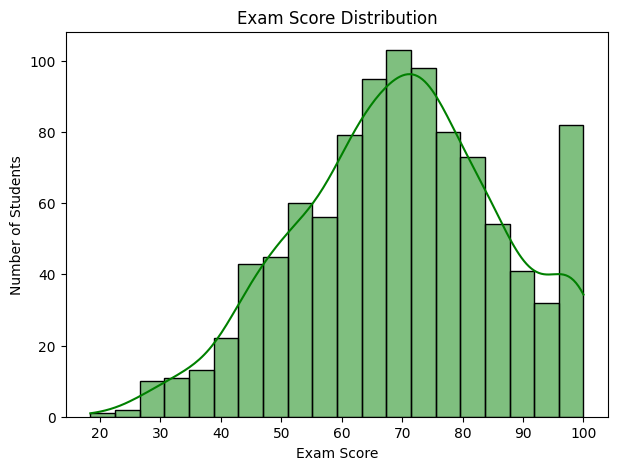

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Study hours distribution
plt.figure(figsize=(7,5))
sns.histplot(df['study_hours_per_day'], bins=20, kde=True, color='blue')
plt.title('Study Hours per Day Distribution')
plt.xlabel('Study Hours')
plt.ylabel('Number of Students')
plt.show()

# Exam score distribution
plt.figure(figsize=(7,5))
sns.histplot(df['exam_score'], bins=20, kde=True, color='green')
plt.title('Exam Score Distribution')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.show()


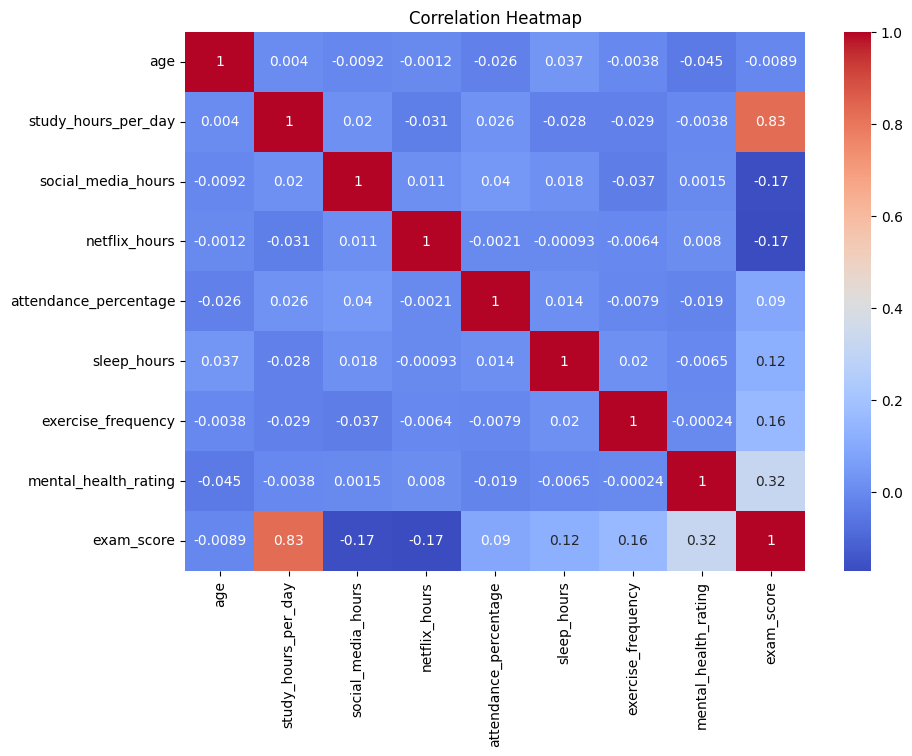

In [9]:
# Only select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

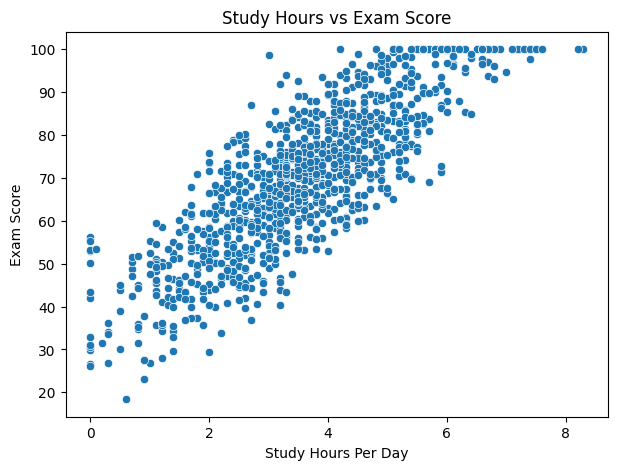

In [10]:
# Scatter plot: Study Hours vs Exam Score

plt.figure(figsize=(7,5))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.show()

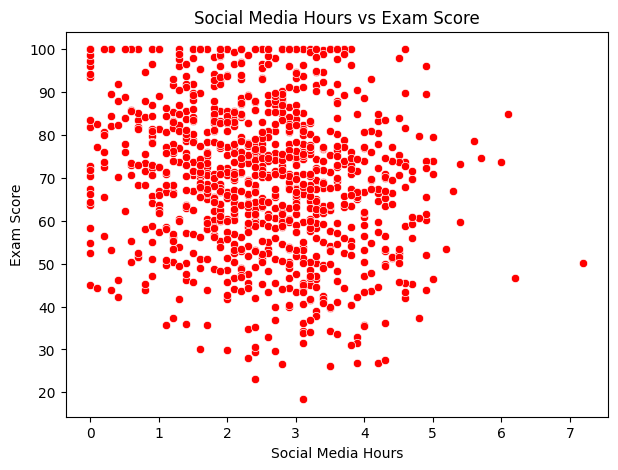

In [11]:
# Scatter plot: Social Media Hours vs Exam Score

plt.figure(figsize=(7,5))
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, color='red')
plt.title('Social Media Hours vs Exam Score')
plt.xlabel('Social Media Hours')
plt.ylabel('Exam Score')
plt.show()

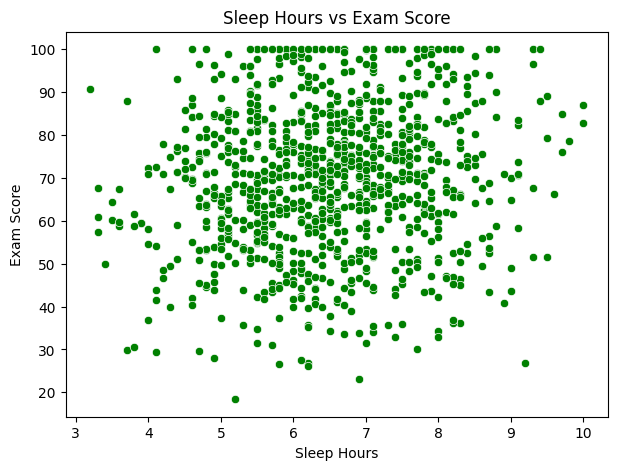

In [12]:
# Scatter plot: Sleep Hours vs Exam Score

plt.figure(figsize=(7,5))
sns.scatterplot(x='sleep_hours', y='exam_score', data=df, color='green')
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()

In [13]:
# Drop student_id
df.drop('student_id', axis=1, inplace=True)

# Create Performance Category
def performance_category(score):
    if score < 50:
        return 'Low Performer'
    elif 50 <= score < 75:
        return 'Average Performer'
    else:
        return 'High Performer'

df['performance_category'] = df['exam_score'].apply(performance_category)

# Save cleaned file
df.to_csv('student_habits_cleaned.csv', index=False)


In [14]:
# Create Performance Category

def performance_category(score):
    if score < 50:
        return 'Low Performer'
    elif 50 <= score < 75:
        return 'Average Performer'
    else:
        return 'High Performer'

df['performance_category'] = df['exam_score'].apply(performance_category)

# Save cleaned file
df.to_csv('student_habits_cleaned.csv', index=False)


In [15]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,performance_category
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,Average Performer
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,High Performer
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Low Performer
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Low Performer
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,Average Performer
